In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("D:\\admission_predict.csv")

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

## Data Understanding

In [6]:
df.nunique()

Serial No.           500
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

In [7]:
df['Chance of Admit '].value_counts()

Chance of Admit 
0.71    23
0.64    19
0.73    18
0.72    16
0.79    16
        ..
0.38     2
0.36     2
0.43     1
0.39     1
0.37     1
Name: count, Length: 61, dtype: int64

In [8]:
df['Chance of Admit '].dtype

dtype('float64')

In [9]:
df.drop(columns=['Serial No.'],inplace=True)

In [10]:
df['GRE Score'].unique()

array([337, 324, 316, 322, 314, 330, 321, 308, 302, 323, 325, 327, 328,
       307, 311, 317, 319, 318, 303, 312, 334, 336, 340, 298, 295, 310,
       300, 338, 331, 320, 299, 304, 313, 332, 326, 329, 339, 309, 315,
       301, 296, 294, 306, 305, 290, 335, 333, 297, 293], dtype=int64)

In [11]:
df['GRE Score'].value_counts()

GRE Score
312    24
324    23
316    18
321    17
322    17
327    17
311    16
320    16
314    16
317    15
325    15
315    13
308    13
323    13
326    12
319    12
313    12
304    12
300    12
318    12
305    11
301    11
310    11
307    10
329    10
299    10
298    10
331     9
340     9
328     9
309     9
334     8
332     8
330     8
306     7
302     7
297     6
296     5
295     5
336     5
303     5
338     4
335     4
333     4
339     3
337     2
290     2
294     2
293     1
Name: count, dtype: int64

In [12]:
df['TOEFL Score'].unique()

array([118, 107, 104, 110, 103, 115, 109, 101, 102, 108, 106, 111, 112,
       105, 114, 116, 119, 120,  98,  93,  99,  97, 117, 113, 100,  95,
        96,  94,  92], dtype=int64)

In [13]:
df['TOEFL Score'].value_counts()

TOEFL Score
110    44
105    37
104    29
107    28
106    28
112    28
103    25
100    24
102    24
99     23
101    20
111    20
108    19
113    19
109    19
114    18
116    16
115    11
118    10
98     10
119    10
120     9
117     8
97      7
96      6
95      3
93      2
94      2
92      1
Name: count, dtype: int64

In [14]:
df['University Rating'].unique()

array([4, 3, 2, 5, 1], dtype=int64)

In [15]:
df['University Rating'].value_counts()

University Rating
3    162
2    126
4    105
5     73
1     34
Name: count, dtype: int64

In [16]:
df['SOP'].unique()

array([4.5, 4. , 3. , 3.5, 2. , 5. , 1.5, 1. , 2.5])

In [17]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [18]:
df['SOP'].value_counts()

SOP
4.0    89
3.5    88
3.0    80
2.5    64
4.5    63
2.0    43
5.0    42
1.5    25
1.0     6
Name: count, dtype: int64

In [19]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [20]:
df['LOR '].unique()

array([4.5, 3.5, 2.5, 3. , 4. , 1.5, 2. , 5. , 1. ])

In [21]:
df['LOR '].value_counts()

LOR 
3.0    99
4.0    94
3.5    86
4.5    63
2.5    50
5.0    50
2.0    46
1.5    11
1.0     1
Name: count, dtype: int64

In [22]:
df['CGPA'].unique()

array([9.65, 8.87, 8.  , 8.67, 8.21, 9.34, 8.2 , 7.9 , 8.6 , 8.4 , 9.  ,
       9.1 , 8.3 , 8.7 , 8.8 , 8.5 , 9.5 , 9.7 , 9.8 , 9.6 , 7.5 , 7.2 ,
       7.3 , 8.1 , 9.4 , 9.2 , 7.8 , 7.7 , 9.3 , 8.85, 7.4 , 7.6 , 6.8 ,
       8.92, 9.02, 8.64, 9.22, 9.16, 9.64, 9.76, 9.45, 9.04, 8.9 , 8.56,
       8.72, 8.22, 7.54, 7.36, 8.02, 9.36, 8.66, 8.42, 8.28, 8.14, 8.76,
       7.92, 7.66, 8.03, 7.88, 7.84, 8.96, 9.24, 8.88, 8.46, 8.12, 8.25,
       8.47, 9.05, 8.78, 9.18, 9.46, 9.38, 8.48, 8.68, 8.34, 8.45, 8.62,
       7.46, 7.28, 8.84, 9.56, 9.48, 8.36, 9.32, 8.71, 9.35, 8.65, 9.28,
       8.77, 8.16, 9.08, 9.12, 9.15, 9.44, 9.92, 9.11, 8.26, 9.43, 9.06,
       8.75, 8.89, 8.69, 7.86, 9.01, 8.97, 8.33, 8.27, 7.98, 8.04, 9.07,
       9.13, 9.23, 8.32, 8.98, 8.94, 9.53, 8.52, 8.43, 8.54, 9.91, 9.87,
       7.65, 7.89, 9.14, 9.66, 9.78, 9.42, 9.26, 8.79, 8.23, 8.53, 8.07,
       9.31, 9.17, 9.19, 8.37, 7.68, 8.15, 8.73, 8.83, 8.57, 9.68, 8.09,
       8.17, 7.64, 8.01, 7.95, 8.49, 7.87, 7.97, 8.

In [23]:
df['CGPA'].value_counts()

CGPA
8.76    9
8.00    9
8.12    7
8.45    7
8.54    7
       ..
9.92    1
9.35    1
8.71    1
9.32    1
7.69    1
Name: count, Length: 184, dtype: int64

In [24]:
df['Research'].unique()

array([1, 0], dtype=int64)

In [25]:
df['Research'].value_counts()

Research
1    280
0    220
Name: count, dtype: int64

In [26]:
df['Chance of Admit '].unique()

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.63, 0.64, 0.7 , 0.94, 0.95,
       0.97, 0.44, 0.46, 0.74, 0.91, 0.88, 0.58, 0.48, 0.49, 0.53, 0.87,
       0.86, 0.89, 0.82, 0.56, 0.36, 0.42, 0.47, 0.55, 0.57, 0.96, 0.93,
       0.38, 0.34, 0.79, 0.71, 0.69, 0.59, 0.85, 0.77, 0.81, 0.83, 0.67,
       0.73, 0.6 , 0.43, 0.51, 0.39, 0.37])

In [27]:
df['Chance of Admit '].value_counts()

Chance of Admit 
0.71    23
0.64    19
0.73    18
0.72    16
0.79    16
        ..
0.38     2
0.36     2
0.43     1
0.39     1
0.37     1
Name: count, Length: 61, dtype: int64

In [28]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [29]:
continous = ['GRE Score','TOEFL Score','CGPA','Chance of Admit ']

discrite_count=['University Rating','SOP','LOR ','Research','Chance of Admit ']

## Exploratory Data Analysis(EDA)
*for continous Variable

In [30]:
df[continous].describe()

,GRE Score,TOEFL Score,CGPA,Chance of Admit
count,500.000000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,8.576440,0.72174
std,11.295148,6.081868,0.604813,0.14114
min,290.000000,92.000000,6.800000,0.34000
25%,308.000000,103.000000,8.127500,0.63000
50%,317.000000,107.000000,8.560000,0.72000
75%,325.000000,112.000000,9.040000,0.82000
max,340.000000,120.000000,9.920000,0.97000


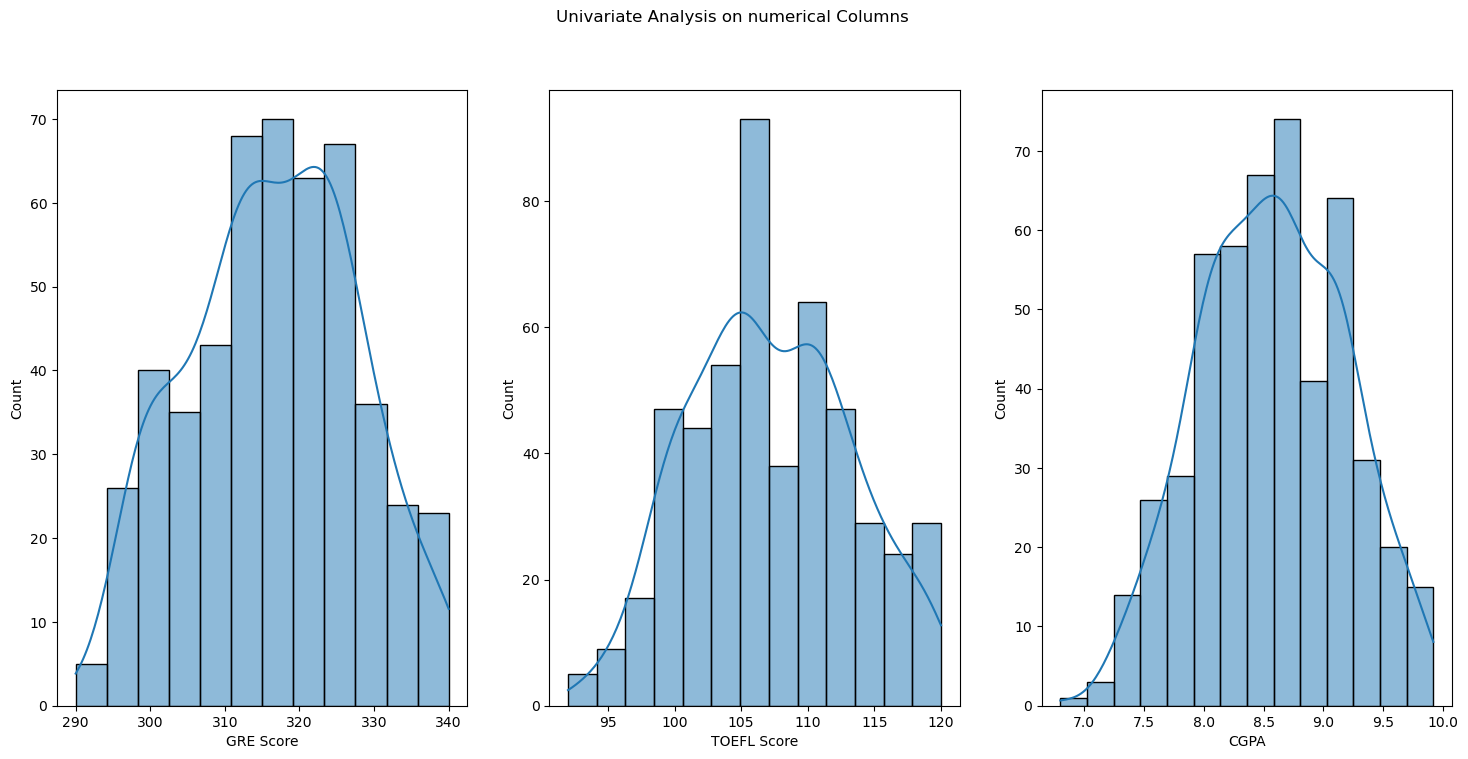

In [31]:
plt.rcParams['figure.figsize']=(18,8)

plt.subplot(1,3,1)
sns.histplot(df['GRE Score'],kde=True)

plt.subplot(1,3,2)
sns.histplot(df['TOEFL Score'],kde=True)

plt.subplot(1,3,3)
sns.histplot(df['CGPA'],kde=True)

plt.suptitle('Univariate Analysis on numerical Columns')
plt.show()

In [32]:
df[continous].skew()

GRE Score          -0.039842
TOEFL Score         0.095601
CGPA               -0.026613
Chance of Admit    -0.289966
dtype: float64

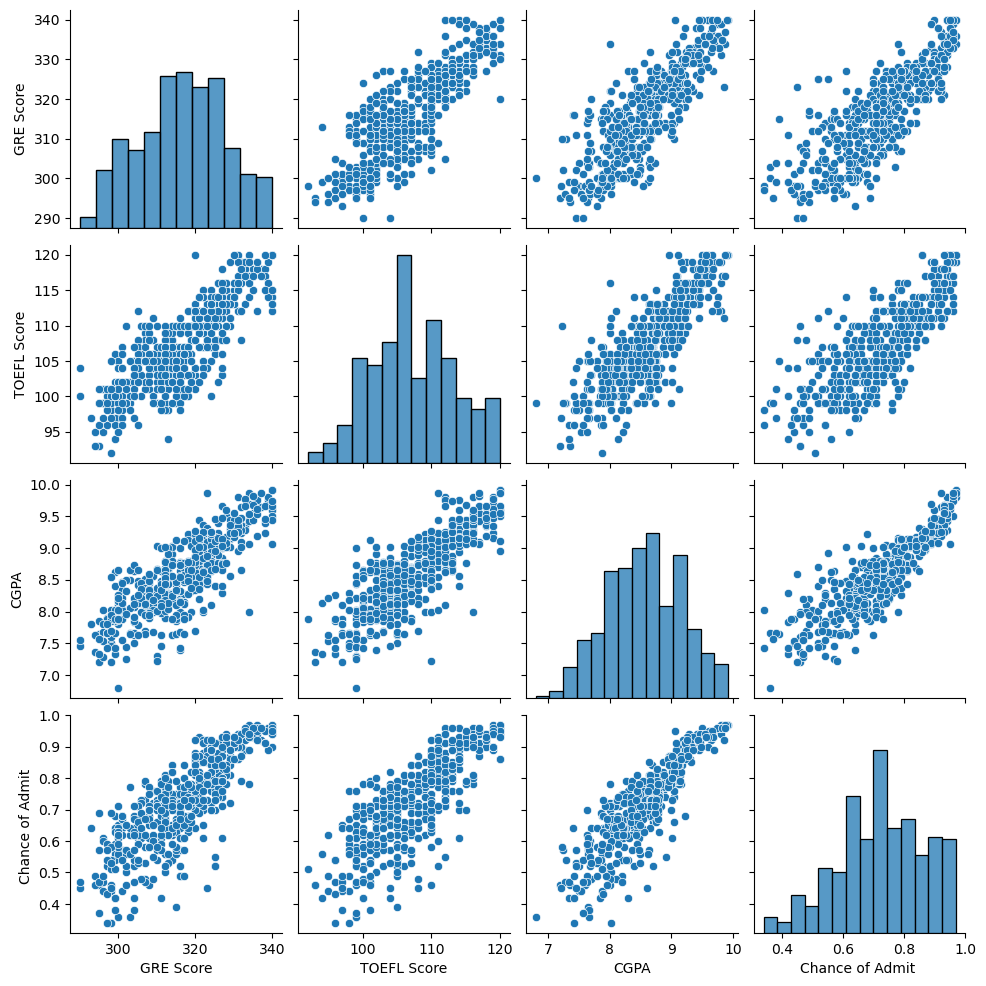

In [33]:
sns.pairplot(df[continous])
plt.show()

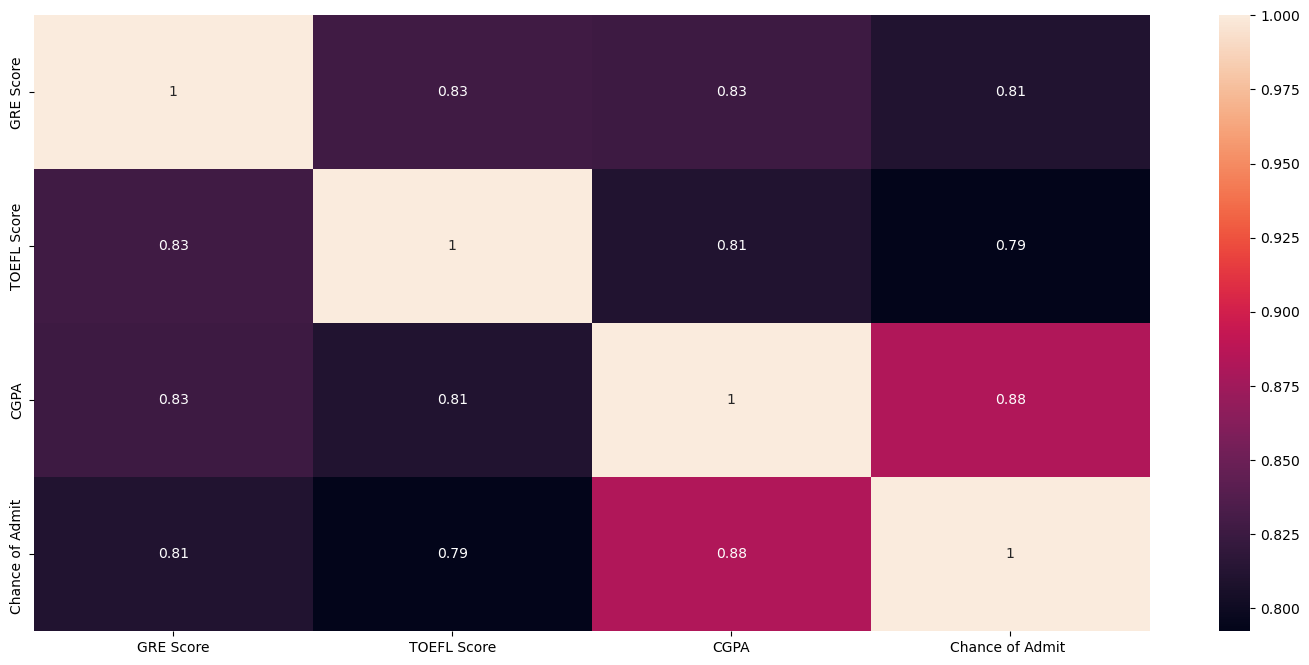

In [34]:
sns.heatmap(df[continous].corr(),annot=True)
plt.show()

<Axes: ylabel='CGPA'>

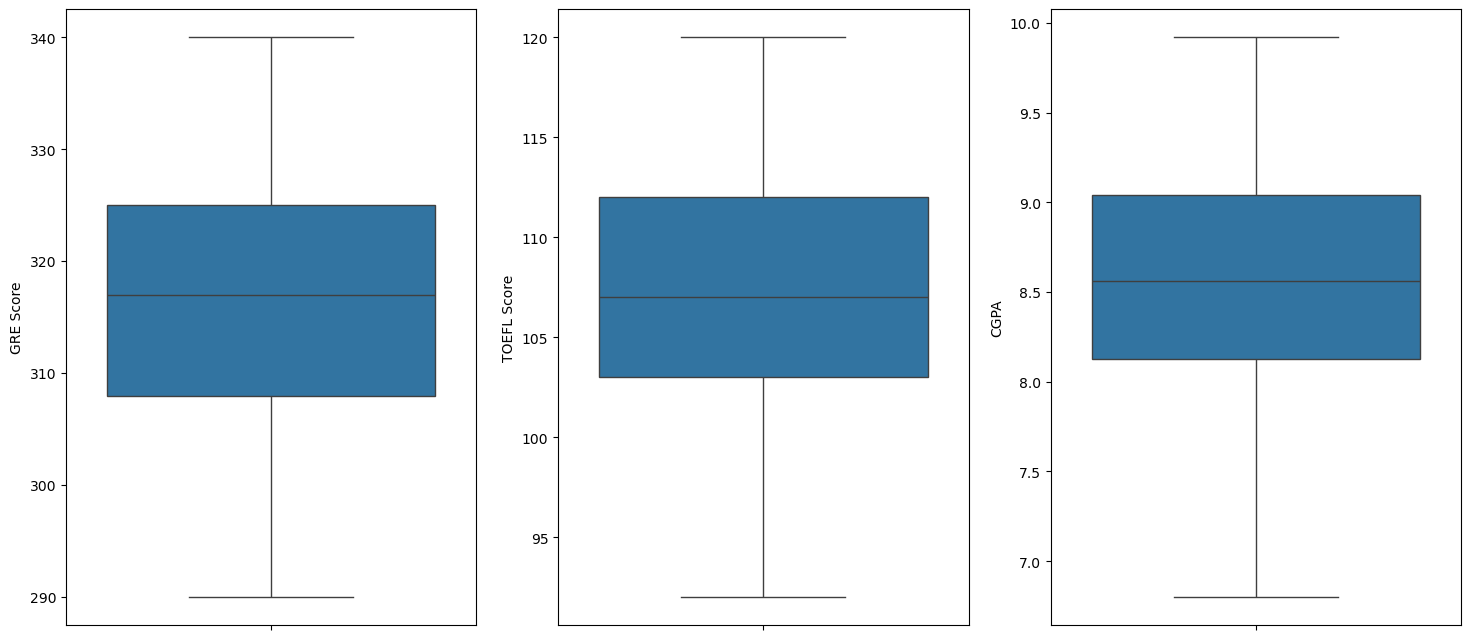

In [35]:
# Lets visualize the outliers using box plot
plt.subplot(1,3,1)
sns.boxplot(df['GRE Score'])

plt.subplot(1,3,2)
sns.boxplot(df['TOEFL Score'])

plt.subplot(1,3,3)
sns.boxplot(df['CGPA'])


## for Discrite Variable

In [36]:
df[discrite_count].describe()

,University Rating,SOP,LOR,Research,Chance of Admit
count,500.000000,500.000000,500.00000,500.000000,500.00000
mean,3.114000,3.374000,3.48400,0.560000,0.72174
std,1.143512,0.991004,0.92545,0.496884,0.14114
min,1.000000,1.000000,1.00000,0.000000,0.34000
25%,2.000000,2.500000,3.00000,0.000000,0.63000
50%,3.000000,3.500000,3.50000,1.000000,0.72000
75%,4.000000,4.000000,4.00000,1.000000,0.82000
max,5.000000,5.000000,5.00000,1.000000,0.97000


<Axes: xlabel='Research', ylabel='count'>

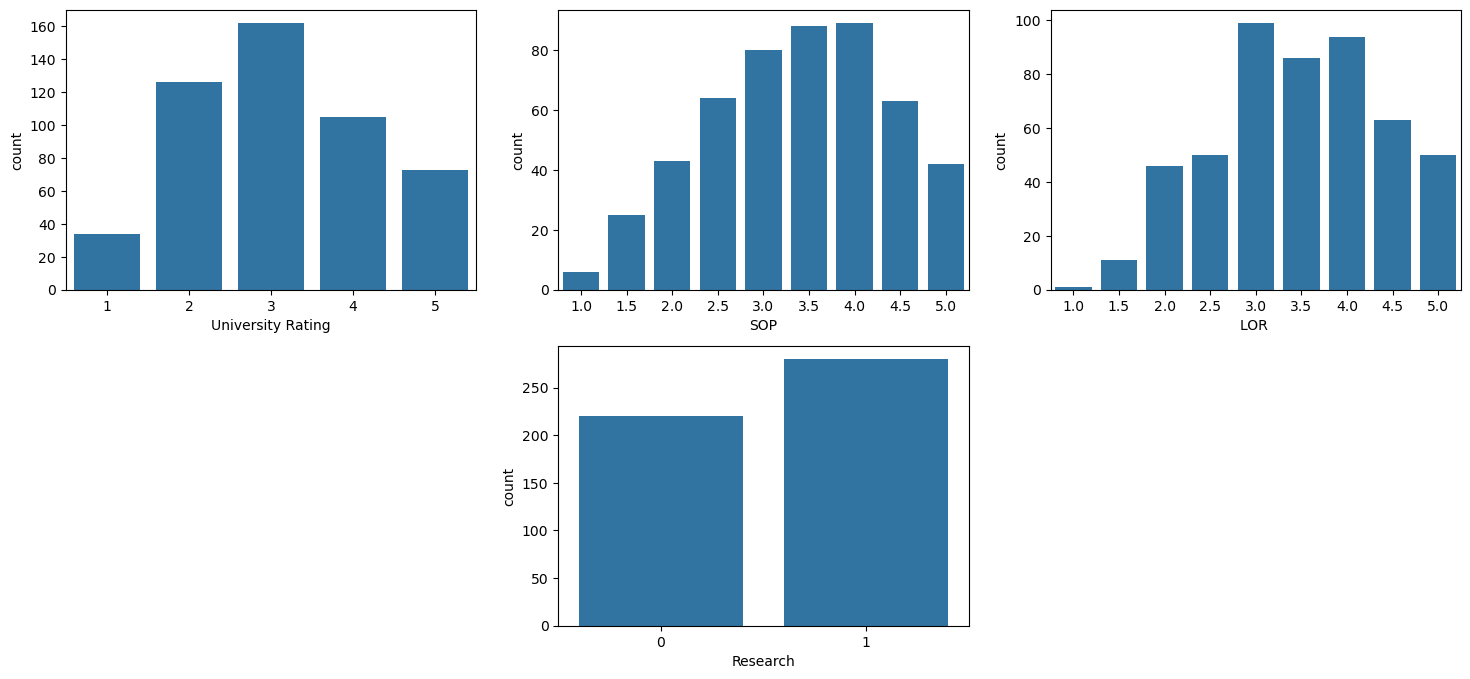

In [37]:
plt.rcParams['figure.figsize']=(18,8)

plt.subplot(2,3,1)
sns.countplot(x=df['University Rating'])

plt.subplot(2,3,2)
sns.countplot(x=df['SOP'])


plt.subplot(2,3,3)
sns.countplot(x=df['LOR '])

plt.subplot(2,3,5)
sns.countplot(x=df['Research'])


## Data Preparation

In [38]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [39]:
df.isnull().sum()/len(df)*100

GRE Score            0.0
TOEFL Score          0.0
University Rating    0.0
SOP                  0.0
LOR                  0.0
CGPA                 0.0
Research             0.0
Chance of Admit      0.0
dtype: float64

## X&y

In [40]:
X = df.drop('Chance of Admit ',axis=1)
y = df['Chance of Admit ']

### identify the best random state number

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression\

train=[]
test=[]
cv=[]
for i in range(0,150):
    model= LinearRegression()
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=i)
    model.fit(X_train,y_train)
    
    ypred_train=model.predict(X_train)
    ypred_test=model.predict(X_test)
    
    
    train.append(model.score(X_train,y_train))
    test.append(model.score(X_test,y_test))
    cv.append(cross_val_score(model,X_train,y_train , cv=5).mean())
    
em = pd.DataFrame({'train':train,'test':test,'cv':cv})
gm = em[(abs(em['train']-em['test'])<=0.05) & (abs(em['test']-em['cv'])<=0.05)]
print("best random state number :",gm[gm['test']==gm['test'].max()].index.to_list())    

best random state number : [99]


## train_test_split

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=99)

In [43]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


## Machine Learning Modelling & Evaluation

In [44]:
from sklearn.linear_model import LinearRegression

# save model 
model=LinearRegression()
# fit
model.fit(X_train,y_train)

print("Intercept:",model.intercept_)
print("Coefficents:",model.coef_)

Intercept: -1.213050718696929
Coefficents: [0.00175249 0.00279607 0.00527311 0.00679377 0.01763335 0.11251841
 0.0236434 ]


## prediction

In [45]:
ypred_test=model.predict(X_test)

## Mean Absolute Error(MAE)

In [46]:
from sklearn.metrics import mean_absolute_error
print("Test MAE:",mean_absolute_error(y_test,ypred_test))

Test MAE: 0.03824562023029512


## Mean Squared Error(MSE)

In [47]:
from sklearn.metrics import mean_squared_error
print("Test MSE:",mean_squared_error(y_test,ypred_test))

Test MSE: 0.0027548348092925846


## Root Mean Squared Error(RMSE)

In [48]:
print("Test RMSE:",np.sqrt(mean_squared_error(y_test,ypred_test)))

Test RMSE: 0.05248652026275494


In [49]:
# Test R2
print("Test R2:",model.score(X_test,y_test))

Test R2: 0.8527660106232575


## SLR 

In [50]:
## Modelling
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
print("Intercept:",model.intercept_)
print("Coefficients:",model.coef_)

#prediction
ypred_train=model.predict(X_train)
ypred_test=model.predict(X_test)

#Evaluation
print("Train R2:",model.score(X_train,y_train))
print("Test R2:",model.score(X_test,y_test))
print("Cross Validation Score:",cross_val_score(model,X,y,cv=5).mean())

Intercept: -1.213050718696929
Coefficients: [0.00175249 0.00279607 0.00527311 0.00679377 0.01763335 0.11251841
 0.0236434 ]
Train R2: 0.8130260614589514
Test R2: 0.8527660106232575
Cross Validation Score: 0.8108015220863886


### 1: KNN

In [51]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

ypred_train=model.predict(X_train)
ypred_test=model.predict(X_test)

print("Train R2:",model.score(X_train,y_train))
print("Test r2:",model.score(X_test,y_test))
print("Cross Validation Score:",cross_val_score(model,X,y,cv=5).mean())

Train R2: 0.8130260614589514
Test r2: 0.8527660106232575
Cross Validation Score: 0.8108015220863886


## 2: Support Vector Machine(SVM)

In [52]:
from sklearn.svm import SVR

estimator=SVR()
param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf', 'sigmoid', 'poly']}

from sklearn.model_selection import GridSearchCV
svm_grid=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
svm_grid.fit(X_train,y_train)

svm_model=svm_grid.best_estimator_

ypred_train=svm_grid.predict(X_train)
ypred_test=svm_model.predict(X_test)

print("Train R2:",model.score(X_train,y_train))
print("Test r2:",model.score(X_test,y_test))
print("Cross Validation Score:",cross_val_score(model,X,y,cv=5).mean())

Train R2: 0.8130260614589514
Test r2: 0.8527660106232575
Cross Validation Score: 0.8108015220863886


## 3: Decision Tree Regressor

In [53]:
from sklearn.tree import DecisionTreeRegressor
estimator=DecisionTreeRegressor(random_state=99)
param_grid={"criterion":["squared_error", "friedman_mse", "absolute_error", "poisson"],
           "max_depth":list(range(1,16))}

from sklearn.model_selection import GridSearchCV
dt_grid=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
dt_grid.fit(X_train,y_train)

dt=dt_grid.best_estimator_

dt_fi=dt.feature_importances_

index=[i for i,x in enumerate(dt_fi) if x>0]

X_train_dt=X_train.iloc[:,index]
X_test_dt=X_test.iloc[:,index]

dt.fit(X_train_dt,y_train)

ypred_train=dt.predict(X_train_dt)
ypred_test=dt.predict(X_test_dt)

print("Train R2:",model.score(X_train,y_train))
print("Test r2:",model.score(X_test,y_test))
print("Cross Validation Score:",cross_val_score(model,X,y,cv=5).mean())

Train R2: 0.8130260614589514
Test r2: 0.8527660106232575
Cross Validation Score: 0.8108015220863886


In [54]:
dt_grid.best_estimator_

DecisionTreeRegressor(max_depth=1, random_state=99)

In [55]:
X_train_dt

,CGPA
2,8.00
125,8.66
430,8.13
416,8.10
324,8.33
...,...
201,8.46
168,7.80
185,9.11
35,9.20


## 4: Random Forest Regressor

In [56]:
from sklearn.ensemble import RandomForestRegressor
estimator=RandomForestRegressor(random_state=99)
param_grid={'n_estimators':list(range(1,51))}

from sklearn.model_selection import GridSearchCV
rf_grid=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
rf_grid.fit(X_train,y_train)

rf=rf_grid.best_estimator_
rf_fi=rf.feature_importances_

index=[i for i,x in enumerate(rf_fi) if x>0]

X_train_rf=X_train.iloc[:,index]
X_test_rf=X_test.iloc[:,index]

rf.fit(X_train_rf,y_train)

ypred_train=rf.predict(X_train_rf)
ypred_test=rf.predict(X_test_rf)

print("Train R2:",model.score(X_train,y_train))
print("Test r2:",model.score(X_test,y_test))
print("Cross Validation Score:",cross_val_score(model,X,y,cv=5).mean())

Train R2: 0.8130260614589514
Test r2: 0.8527660106232575
Cross Validation Score: 0.8108015220863886


## 5: Adaboost Regressor

In [57]:
from sklearn.ensemble import AdaBoostRegressor
estimator=AdaBoostRegressor(random_state=99)
param_grid={"n_estimators":list(range(1,10))}

from sklearn.model_selection import GridSearchCV
ab_grid=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)

ab_grid.fit(X_train,y_train)

ab=ab_grid.best_estimator_
ab_fi=ab.feature_importances_

index=[i for i,x in enumerate(ab_fi) if x>0]

X_train_ab=X_train.iloc[:,index]
X_test_ab=X_test.iloc[:,index]

ab.fit(X_train_ab,y_train)

ypred_train=ab.predict(X_train_ab)
ypred_test=ab.predict(X_test_ab)

print("Train R2:",model.score(X_train,y_train))
print("Test r2:",model.score(X_test,y_test))
print("Cross Validation Score:",cross_val_score(model,X,y,cv=5).mean())

Train R2: 0.8130260614589514
Test r2: 0.8527660106232575
Cross Validation Score: 0.8108015220863886


## 7: Gradient Boost Regressor

In [58]:
from sklearn.ensemble import GradientBoostingRegressor
estimator=GradientBoostingRegressor(random_state=99)
parma_grid={"n_estimators":list(range(1,10)),"learning_rate":[0.1,0.2,0.3,0.4,0.5]}

from sklearn.model_selection import GridSearchCV
gb_grid=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
gb_grid.fit(X_train,y_train)


gb=gb_grid.best_estimator_
gb_fi=gb.feature_importances_

index=[i for i,x in enumerate(gb_fi) if x>0]

X_train_gb=X_train.iloc[:,:]
X_test_gb=X_test.iloc[:,:]

gb.fit(X_train_gb,y_train)

ypred_train=gb.predict(X_train_gb)
ypred_test=gb.predict(X_test_gb)

print("Train R2:",model.score(X_train,y_train))
print("Test r2:",model.score(X_test,y_test))
print("Cross Validation Score:",cross_val_score(model,X,y,cv=5).mean())

Train R2: 0.8130260614589514
Test r2: 0.8527660106232575
Cross Validation Score: 0.8108015220863886
